# Convolutional Neural Networks


In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [2]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 2s 0us/step


Let's take a look at a sample of the images in the dataset:

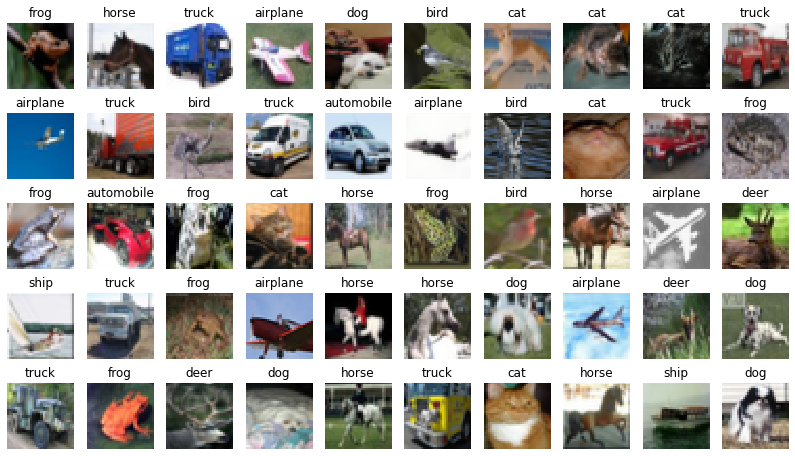

In [3]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [4]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

Mean=X_train.mean(axis=0)
std=X_train.std(axis=0)
X_train_scaled=((X_train-Mean)/std)

Mean=X_train.mean(axis=0)
std=X_train.std(axis=0)
X_valid_scaled=((X_valid-Mean)/std)

Mean=X_train.mean(axis=0)
std=X_train.std(axis=0)
X_test_scaled=((X_test-Mean)/std)

X_train = X_train_scaled
X_valid = X_valid_scaled
X_test = X_test_scaled


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)



###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 29s 81ms/step - loss: 1.4669 - accuracy: 0.4891 - val_loss: 1.2568 - val_accuracy: 0.5560
Epoch 2/10
352/352 [==============================] - 28s 80ms/step - loss: 1.1467 - accuracy: 0.6029 - val_loss: 1.1460 - val_accuracy: 0.6022
Epoch 3/10
352/352 [==============================] - 28s 79ms/step - loss: 1.0334 - accuracy: 0.6434 - val_loss: 1.0591 - val_accuracy: 0.6344
Epoch 4/10
352/352 [==============================] - 28s 79ms/step - loss: 0.9559 - accuracy: 0.6728 - val_loss: 1.0141 - val_accuracy: 0.6506
Epoch 5/10
352/352 [==============================] - 28s 80ms/step - loss: 0.8955 - accuracy: 0.6956 - val_loss: 0.9996 - val_accuracy: 0.6526
Epoch 6/10
352/352 [==============================] - 28s 79ms/step - loss: 0.8594 - accuracy: 0.7046 - val_loss: 1.0390 - val_accuracy: 0.6496
Epoch 7/10
352/352 [==============================] - 28s 79ms/step - loss: 0.8261 - accuracy: 0.7148 - val_loss: 1.0203 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 2s - loss: 1.0517 - accuracy: 0.6450 - 2s/epoch - 7ms/step
accuracy: 64.50%


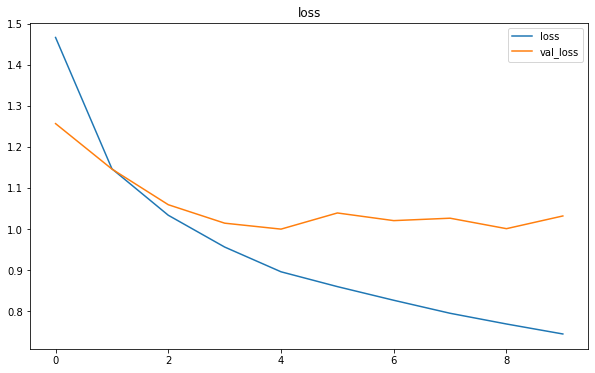

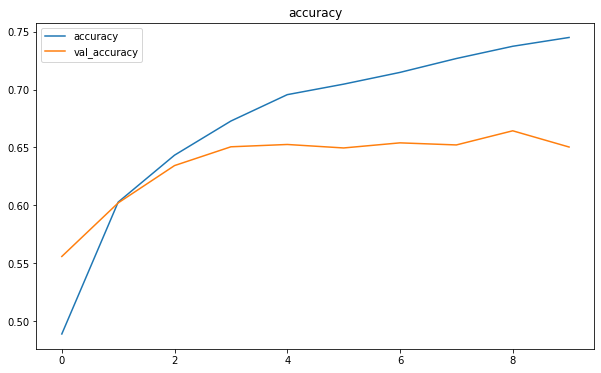

In [9]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

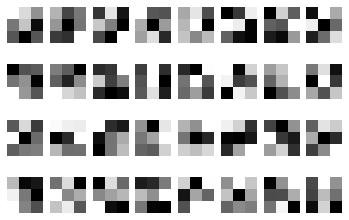

In [10]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   [TO COMPLETE] For the first convolution layer: conv2d_2, the parameters are calculated using the kernal size(3x3), input image depth (3) and the total number of filters (32):

(3x3) x3 = 27 # here we calculate the no. of parameters for one filter for the given kernal size and image depth.

27+1 = 28 # we add 1 for each filter to serve as the bias.

28 x 32 = 896 # we then calcualte the number of parameters for the total number of filters. 

For the second convolution layer: conv2d_3, the parameters are calculated using the kernal size (2x2), the total number of filters from the previous convolution layer (32) and the number of filters from the current layer(16):

(2x2)x32=128 # here we calculate the number of paramters for one filter using the kernal size and number of filters from the previous layer.

128+1=129 # add 1 for each filter to serve as the bias

129 x 16 = 2064 #calculate the parameters for the total number of filters. 

2.   [TO COMPLETE] In the second convolution layer for this network, it's parameters are inclusive of the filters from the previous layer because the neurons in this layer are connected to every other neuron from the previous layer. So the number of filters at the input for this layer are the same as the total number of filters from the previous convolution layer. 

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 31s 86ms/step - loss: 1.6017 - accuracy: 0.4300 - val_loss: 1.3423 - val_accuracy: 0.5336
Epoch 2/10
352/352 [==============================] - 30s 87ms/step - loss: 1.2969 - accuracy: 0.5470 - val_loss: 1.2487 - val_accuracy: 0.5642
Epoch 3/10
352/352 [==============================] - 30s 85ms/step - loss: 1.1991 - accuracy: 0.5822 - val_loss: 1.1675 - val_accuracy: 0.5968
Epoch 4/10
352/352 [==============================] - 30s 85ms/step - loss: 1.1328 - accuracy: 0.6055 - val_loss: 1.1242 - val_accuracy: 0.6132
Epoch 5/10
352/352 [==============================] - 30s 84ms/step - loss: 1.0770 - accuracy: 0.6279 - val_loss: 1.0770 - val_accuracy: 0.6216
Epoch 6/10
352/352 [==============================] - 30s 84ms/step - loss: 1.0302 - accuracy: 0.6442 - val_loss: 1.0374 - val_accuracy: 0.6432
Epoch 7/10
352/352 [==============================] - 30s 85ms/step - loss: 0.9941 - accuracy: 0.6572 - val_loss: 1.0218 - val_accuracy:

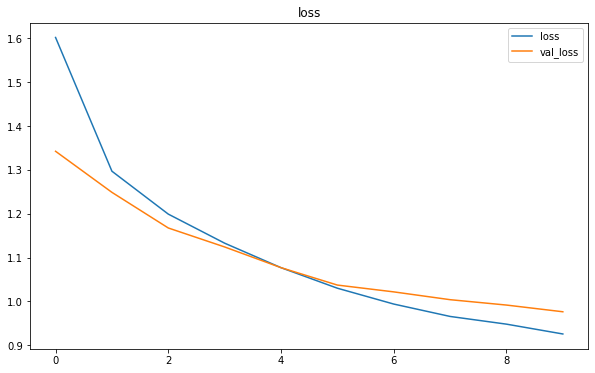

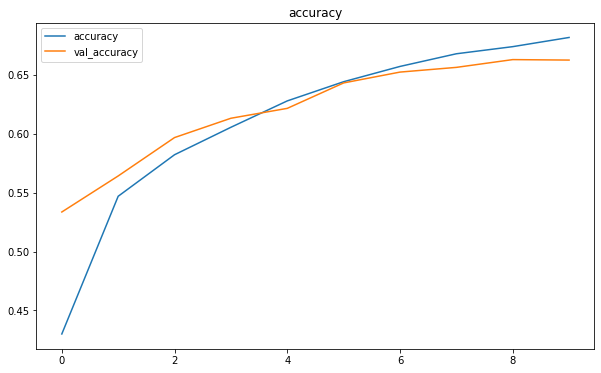

In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [57]:
#[TO COMPLETE]
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=24, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 30, 30, 48)        1344      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 15, 15, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 14, 14, 24)        4632      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 7, 7, 24)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 1176)              0         
                                                                 
 dense_21 (Dense)            (None, 10)              

Epoch 1/10
352/352 [==============================] - 40s 113ms/step - loss: 1.5391 - accuracy: 0.4536 - val_loss: 1.3068 - val_accuracy: 0.5394
Epoch 2/10
352/352 [==============================] - 41s 115ms/step - loss: 1.2077 - accuracy: 0.5798 - val_loss: 1.1146 - val_accuracy: 0.6088
Epoch 3/10
352/352 [==============================] - 40s 114ms/step - loss: 1.0737 - accuracy: 0.6289 - val_loss: 1.0407 - val_accuracy: 0.6376
Epoch 4/10
352/352 [==============================] - 40s 114ms/step - loss: 1.0013 - accuracy: 0.6543 - val_loss: 0.9805 - val_accuracy: 0.6556
Epoch 5/10
352/352 [==============================] - 40s 114ms/step - loss: 0.9524 - accuracy: 0.6725 - val_loss: 0.9730 - val_accuracy: 0.6668
Epoch 6/10
352/352 [==============================] - 40s 114ms/step - loss: 0.9178 - accuracy: 0.6851 - val_loss: 0.9781 - val_accuracy: 0.6648
Epoch 7/10
352/352 [==============================] - 40s 114ms/step - loss: 0.8883 - accuracy: 0.6958 - val_loss: 0.9348 - val_ac

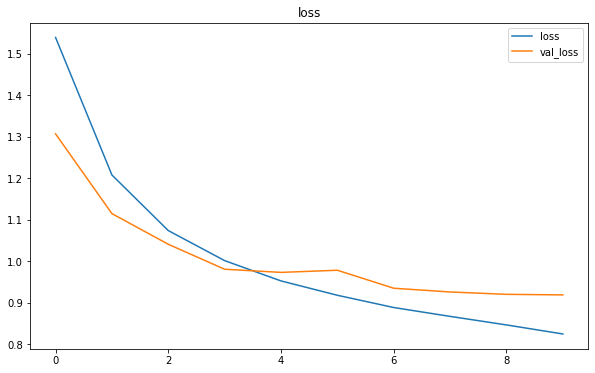

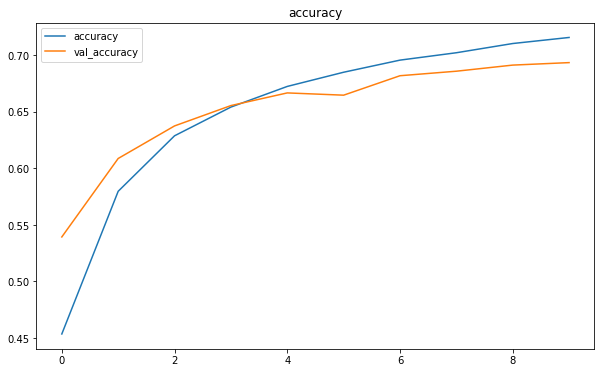

In [58]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found had an increase in the number of filters in each convolution layer to 48 and 24 respectively. 

The achieved accuracy in the test set is 68.54% compared to the previous model which had an accuracy of 65.96% - a 2.58% overall increase.

Discussion:
The filters parameter had the strongest influence over the model accuracy as it maintained the model's efficiency when adjusted which was an issue when making modifications to the other hyperparameters.To confirm this choice as my best model, I experimented with an even higher number of filters, but as this increased, the training loss started to decrease significantly from the validation loss which demonstrated evidence of model overfitting. I therefore found that these filters demonstrated the threshold for the best model without compromising the model efficacy. 

It can be seen from the plots of the accuracy and loss trends that the training loss in my model, starts to deviate from the validation loss at around the same point as the previous model. However in my model the training loss starts to deviate from the validation loss a little sooner. So this model is representitive of the best model that I could find as it was the only model that increased the accuracy without compromising the efficiency significantly. 

The other models that I had tested had the following adjustments: 

*Size of the kernel - both an increase and decrease

*activation functions for convolution layers: LeakyReLU and Tanh

*activiation function for the output layer: sigmoid

*epochs - both an increase and decrease in the number of epochs

*batch sizes- both an increase and decrease in the size of the batches

*optimizers: Adamax, nadam, SGD and Rmsprop

*max-pooling on and off each of the respective layers

Discussion:

The kernel size was found to be the second strongest influencer of the model accuracy. Both increasing and decreasing the size of the kernel reduced the accuracy by 1.5% and 1.98% respectively. Since there was no evidence of an improvement in the model, I decided to keep the same dimensions of the kernel from the previous model. 

The tanh activation function reduced the model accuracy by 0.59% whereas the LeakyReLU function increased the model accuracy by 0.45% which is unsurprising, as it ensures that all the weights are updated regarding gradients in the negative region.The improvement to the model is not very significant regarding this problem, so it suffices to use the relu function. 

The use of the sigmoid activation function in the output layer reduced the accuracy by 0.03%, so it wasn't neccessary to modify this parameter. 

Increasing the batch size reduced the model accuracy by 1.68% whereas increasing the number of epochs improved the accuracy up to 2%.  The epochs and batch sizes both conveyed a larger accuracy of the model when reduced - with a batch size of 70 having an accuracy of 68.20%. However, in all instances of higher accuracy, the training loss  was significantly lower than the validation loss to the point where it rendered the model useless. Therefore adjusting these parameters did not produce an efficient model. 

The nadam and adamax optimizers decreased the accuracy by 0.69% and 5.96% respectively. The RmsProp had around a 4% reduction in accuracy and the SGD optimizer produced up to a 10% loss in accuracy. The causes of these larger reductions are likely due to the lack of suitability to the problem at hand. Out of all these optimisers the nadam seemed to be most suited to the model but as it showed no improvement, it sufficed to maintain the original optimizer. 

The Max pooling layer was removed from the first convolution layer whilst the second convolution layer kept the max pooling on and vice versa. In both instances no improvement in the accuracy was seen and the reduction in accuracy was between 0 and 1%, so both max pooling layers remained for the final model. 